In [1]:
import nltk
import spacy
from wordcloud import STOPWORDS, WordCloud
from autocorrect import Speller

import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import re
import unicodedata
from string import punctuation


from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score, auc,
                             classification_report, confusion_matrix, f1_score,
                             precision_recall_curve, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, SVMSMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 7

import warnings
warnings.filterwarnings('ignore')


In [2]:
# methods for preprocessing
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence, stop_words):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_URL(text):
    return re.sub(r'http\S+', '', text)
    #sample_text = 'this is link for https://lms.simplilearn.com/courses/3817/PG-DS---Natural-Language-Processing/assessment simplilearn....another link https://www.google.com/'
    #remove_URL(sample_text)

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def remove_linebreaks(text):
    return text.replace('\n', ' ').replace('\r', ' ')

def remove_IP(text):
    # declaring the regex pattern for IP addresses
    # text_after = re.sub(regex_search_term, regex_replacement, text_before)
    return re.sub(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', '', text)
    #sample_ip = '123.268.2.1 test1 256.122.12.122'
    #remove_IP(sample_ip)


def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# def pre_process1( text):
#     """
#     """
#     text = remove_accented_chars(text)
#     text = expand_contractions(text, contractions_dict)
#     text = remove_punct(text)
#     text = autospell(text)
#     text = to_lower(text)
#     text = remove_stopwords(text)
#     text = remove_numbers(text)
#     #text = lemmatize(text)
#     text = stemming(text)
#     text = word_tokenize(text)
#     return ' '.join(text)


# def pre_process2(text):
#         lower_text = to_lower(text)
#         sentence_tokens = sentence_tokenize(lower_text)
#         word_list = []
#         for each_sent in sentence_tokens:
#             lemmatizzed_sent = lemmatize(each_sent)
#             clean_text = remove_numbers(lemmatizzed_sent)
#             clean_text = remove_punct(clean_text)
#             clean_text = remove_Tags(clean_text)
#             clean_text = remove_stopwords(clean_text)
#             word_tokens = word_tokenize(clean_text)
#             for i in word_tokens:
#                 word_list.append(i)
#         return word_list

# def pre_processing3(document):
#   #1. Remove Punctuations
#   sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
#   #2. Extract words out of the sentences
#   words = sentWithoutPunct.split()
#   #3. Normalize the data (lowercase)
#   wordNormalized = [word.lower() for word in words]
#   # 4. Remove Stopwords
#   vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
#   # 5. Apply Stemming
#   # a. Exclude those words with NER prop 
#   ner_words = [tokens.text for tokens in ner(document).ents]
#   # b. perform Stemming with other words
#   stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

#   return stemmed

# def preprocess_4(text):
#     text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
#     text = re.sub(r'@', '', text)
#     text = re.sub(r'#', '', text)
#     text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
#     text = re.sub("'s", "", text)
    
#     text = remove_linebreaks(text)
#     text = remove_accented_chars(text)
#     text = expand_contractions(text, contractions_dict)
#     text = remove_punct(text)
#     text = to_lower(text)
#     text = remove_stopwords(text)
#     text = remove_numbers(text)
#     #text = lemmatize(text)
#     text = stemming(text)
#     text = word_tokenize(text)
    
#     return ' '.join(text)

def preprocess_Wiki(text, stop_words):
    text = remove_IP(text)
    text = remove_URL(text)
    
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    # text = re.sub(r'@', '', text)
    # text = re.sub(r'#', '', text)
    # text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    # text = re.sub("'s", "", text)
    
    text = remove_linebreaks(text)
    #text = remove_accented_chars(text)
    #text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = to_lower(text)
    text = remove_stopwords(text, stop_words=stop_words)
    text = remove_numbers(text)
    #text = lemmatize(text)
    #text = stemming(text)
    text = word_tokenize(text)
    
    return ' '.join(text)

def preprocesscustom_stpwords(text, stop_words):
    text = remove_stopwords(text, stop_words=stop_words)
    text = word_tokenize(text)
    return ' '.join(text)


***
### Remove from stopwords words like no , not.. which may be prerequiite to toxicity
***

In [3]:
str(stop_words)

'{\'don\', "you\'d", \'m\', \'what\', \'these\', \'is\', \'this\', \'just\', \'doesn\', "needn\'t", "wasn\'t", \'to\', \'wasn\', \'that\', \'had\', \'very\', "shan\'t", \'d\', \'s\', "should\'ve", \'an\', \'y\', \'mightn\', \'who\', \'have\', \'if\', \'doing\', \'hers\', "haven\'t", "don\'t", "hasn\'t", \'do\', \'here\', \'up\', \'each\', "couldn\'t", \'then\', \'am\', \'hasn\', \'why\', "wouldn\'t", \'were\', \'as\', \'not\', \'aren\', "hadn\'t", \'other\', \'weren\', \'such\', \'over\', \'me\', \'does\', \'a\', "mightn\'t", \'all\', \'re\', \'nor\', \'at\', \'didn\', "weren\'t", \'herself\', \'our\', \'once\', \'while\', \'between\', \'haven\', \'itself\', \'where\', \'ain\', \'shan\', \'can\', \'until\', "aren\'t", \'same\', \'couldn\', "didn\'t", \'but\', \'being\', \'whom\', \'my\', \'himself\', \'and\', \'only\', \'few\', \'most\', \'won\', \'there\', \'too\', \'when\', \'been\', \'are\', \'his\', \'both\', \'hadn\', \'out\', \'be\', \'of\', \'him\', \'above\', \'themselves\', \'

In [4]:
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('don')
stop_words.remove('won')
stop_words.remove('nor')
stop_words.remove('were')
stop_words.remove('haven')

In [5]:
wiki = pd.read_csv('content/train.csv')
wiki

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0
...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0


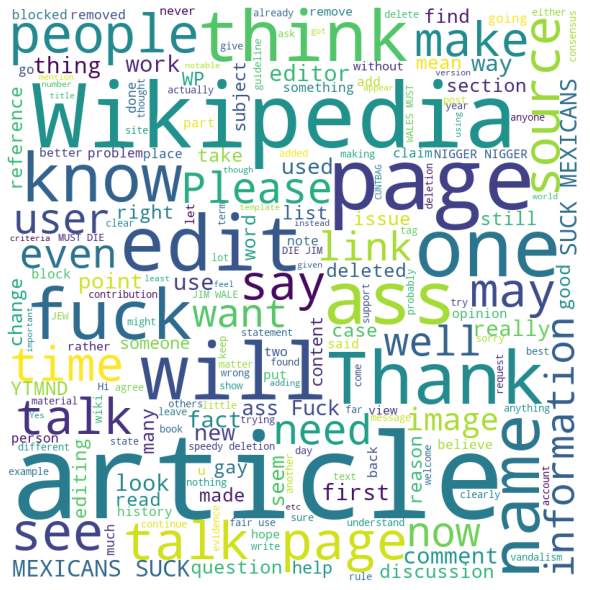

In [6]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(wiki['comment_text']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [7]:
wiki.isna().sum()

id              0
comment_text    0
toxic           0
dtype: int64

***
### no Nan's detected
***

In [8]:
wiki.toxic.value_counts()

0    4563
1     437
Name: toxic, dtype: int64

***
### Data lable is highly imbalanced...we shall use a basic method of stratification while building model
### Preprocessing text
>### Using regular expressions, remove IP addresses
>### Using regular expressions, remove URLs
>### Normalize the casing
>### Tokenize using word_tokenize from NLTK
>### Remove stop words
>### Remove punctuation
***

In [9]:
wiki['preprocess_wiki'] = wiki['comment_text'].apply(preprocess_Wiki, args=(stop_words,))
wiki['preprocess_wiki']

0       barnstar defender wiki barnstar like edit kaya...
1       seems unbalanced whatever said mathsci said fa...
2       marya dzmitruk born minsk belarus march mother...
3                                  talkback dear celestia
4       new categories honestly think need add categor...
                              ...                        
4995    dildo read response correctly never said going...
4996                          calm calm dont get big dick
4997    opinion dougweller using privileges poorly per...
4998     style section expanded didnt remember placed tag
4999    one not agreement repulican joe hazelton wack ...
Name: preprocess_wiki, Length: 5000, dtype: object

***
### Using a counter, find the top terms in the data. 
### Can any of these be considered contextual stop words? 
### Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
### If yes, drop these from the data
***

In [10]:
cv = CountVectorizer()
vec = cv.fit(wiki['preprocess_wiki'])
bow = cv.transform(wiki['preprocess_wiki'])
sum_of_words = bow.sum(axis=0)
words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [11]:
custom_stopwords = []
nlp = spacy.load('en_core_web_sm')

In [12]:
def get_nlp_results(text):
    doc = nlp(text)
    entity = doc.ents[0].label_ if len(doc.ents) > 0 else np.NaN
    #return (token[0].pos_, entity)
    for token in doc:
        return pd.Series([entity, token.lemma_, token.pos_, token.tag_, token.dep_,
                token.shape_, token.is_alpha, token.is_stop])

In [13]:
df_most_freq_words = pd.DataFrame(words_freq, columns=['word', 'freq'])
df1 = pd.DataFrame(df_most_freq_words['word'].apply(get_nlp_results))
df1.columns = ['entity', 'token.lemma_', 'token.pos_', 'token.tag_', 'token.dep_',
                'token.shape_', 'token.is_alpha', 'token.is_stop']
df2 = pd.concat([df_most_freq_words, df1], axis=1)
df2

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
0,not,3029,NaN,not,PART,RB,ROOT,xxx,True,True
1,article,1660,NaN,article,NOUN,NN,ROOT,xxxx,True,False
2,page,1508,NaN,page,NOUN,NN,ROOT,xxxx,True,False
3,wikipedia,1132,ORG,wikipedia,PROPN,NNP,ROOT,xxxx,True,False
4,talk,1063,NaN,talk,VERB,VB,ROOT,xxxx,True,False
...,...,...,...,...,...,...,...,...,...,...
23477,opinio,1,NaN,opinio,PROPN,NNP,ROOT,xxxx,True,False
23478,priveleges,1,NaN,privelege,NOUN,NNS,ROOT,xxxx,True,False
23479,repulican,1,GPE,repulican,ADJ,JJ,ROOT,xxxx,True,False
23480,hazelton,1,ORG,hazelton,PROPN,NNP,ROOT,xxxx,True,False


***
### Remove Cardinal values(one., two, million, thousand...)
***

In [14]:
spacy.explain('CARDINAL')

'Numerals that do not fall under another type'

In [15]:
df2[df2['entity'] == 'CARDINAL'].head(20)

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
8,one,857,CARDINAL,one,NUM,CD,ROOT,xxx,True,True
77,two,242,CARDINAL,two,NUM,CD,ROOT,xxx,True,True
320,three,93,CARDINAL,three,NUM,CD,ROOT,xxxx,True,True
391,four,75,CARDINAL,four,NUM,CD,ROOT,xxxx,True,True
510,five,59,CARDINAL,five,NUM,CD,ROOT,xxxx,True,True
999,half,29,CARDINAL,half,NOUN,NN,ROOT,xxxx,True,False
1190,thousands,24,CARDINAL,thousand,NOUN,NNS,ROOT,xxxx,True,False
1277,six,22,CARDINAL,six,NUM,CD,ROOT,xxx,True,True
1584,feb,17,CARDINAL,feb,PROPN,NNP,ROOT,xxx,True,False
1591,zero,17,CARDINAL,zero,NUM,CD,ROOT,xxxx,True,False


In [16]:
custom_stopwords.extend(df2[df2['entity'] == 'CARDINAL']['word'].to_list())
# df2 = df2.drop(df2[df2['entity'] == 'CARDINAL'].index.values)
# df2[df2['entity'] == 'CARDINAL'].head(20) # confirm deletioin

***
### Remove ORGanizatioins which are proper nouns
***

In [17]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [18]:
df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')]

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
3,wikipedia,1132,ORG,wikipedia,PROPN,NNP,ROOT,xxxx,True,False
874,house,33,ORG,house,PROPN,NNP,ROOT,xxxx,True,False
1057,muslim,27,ORG,muslim,PROPN,NNP,ROOT,xxxx,True,False
1160,islam,25,ORG,islam,PROPN,NNP,ROOT,xxxx,True,False
1170,gayvn,25,ORG,gayvn,PROPN,NNP,ROOT,xxxx,True,False
...,...,...,...,...,...,...,...,...,...,...
23348,mls,1,ORG,mls,PROPN,NNP,ROOT,xxx,True,False
23360,corbett,1,ORG,corbett,PROPN,NNP,ROOT,xxxx,True,False
23446,magazineand,1,ORG,magazineand,PROPN,NNP,ROOT,xxxx,True,False
23470,hominen,1,ORG,hominen,PROPN,NNP,ROOT,xxxx,True,False


In [19]:
custom_stopwords.extend(df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')]['word'].values)
# df2 = df2.drop(df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')].index.values)
# df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')] # confirm deletioin

In [20]:
# remove duplicates
custom_stopwords = list(set(custom_stopwords))

***
### REmove custom stop words from preprocessed column
***

In [21]:
wiki['preprocess_wiki_custom'] = wiki['preprocess_wiki'].apply(preprocesscustom_stpwords, args=(custom_stopwords,))
wiki


,id,comment_text,toxic,preprocess_wiki,preprocess_wiki_custom
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender wiki barnstar like edit kaya...,barnstar defender wiki barnstar like edit kaya...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new categories honestly think need add categor...
...,...,...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0,dildo read response correctly never said going...,dildo read response correctly never said going...
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1,calm calm dont get big dick,calm calm dont get big dick
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0,opinion dougweller using privileges poorly per...,opinion dougweller using privileges poorly per...
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0,style section expanded didnt remember placed tag,style section expanded didnt remember placed tag


***
### ML
***

In [119]:
features = wiki['preprocess_wiki_custom']
labels = wiki['toxic']

In [120]:
X_train, X_test, y_train, y_test= train_test_split(features, labels.values, test_size=0.3, random_state=42, stratify=labels)

In [121]:
tfidfvect = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
tfidfvect = tfidfvect.fit(X_train, y_train)
tfidfObject_train = tfidfvect.transform(X_train)
tfidfObject_test = tfidfvect.transform(X_test)

***
### Model building: Support Vector Machine
>### Instantiate SVC from sklearn with a linear kernel
>### Fit on the train data
>### Make predictions for the train and the test set
***

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       1.00      0.83      0.91       306

    accuracy                           0.98      3500
   macro avg       0.99      0.91      0.95      3500
weighted avg       0.99      0.98      0.98      3500



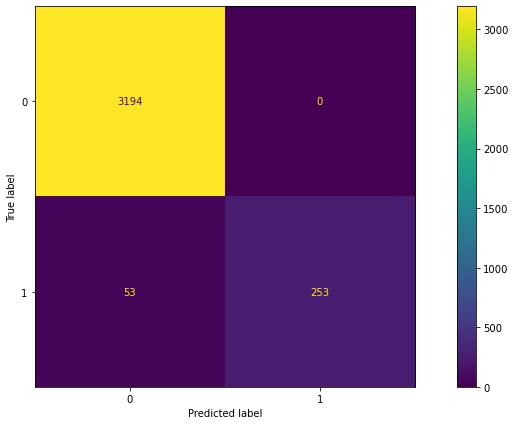

In [122]:
rfclf = SVC(random_state=42)
rfclf.fit(tfidfObject_train, y_train)

y_pred_train = rfclf.predict(tfidfObject_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay(confusion_matrix= cm_train).plot()

***
The data is highly imbalanced and is completely biased with majority of non-toxic.

Report the accuracy on the train set
>We have accuracy of 98.05%. Quality of model looks good in predicting overall.
>However due to huge imbalance in data, this score is largely contributed by TN(majority of non-toxic).
>Such model can perform poorly on a majority toxic biased data.

Report the recall(True Positive Rate/ sensitivity) on the train set:decent, high, low?
>100% (no FP) on non-toxic meaning model is able to completely capture non-toxic without any misclassification
>78%(238 samples) correcly classified toxic, model misclassified 33% (68 samples) as non-toxic(FN)
>The Cost Sensitivity of misclassification can be considered high, in that, 68 samples of minority class were classified as majority (False Negative)
>Since we are interested in rarer event's(toxicity on wiki), we focus on improving on this aspect

Get the f1_score on the train set
>99% on non-toxic so we have a good balance between precision and recall
>88% on toxic...we track this in our next steps where we improve on recall which tend to reduce precision in turn reducing F1-score
  
Objective:
>We need to find optimum balance between FN(71) anf FP(0) so that we dont toxify non-toxic texts (good users will be very angry and might even leave the site) at the same time identify toxic material in acceptable range.
>Hence focus will be on finding that balanced value for Recall (which is relaed with FN) and F1-score (balance between precision and accuracy)

***

In [123]:
def run_cv_SVC_Pipe(steps, params, show_classif_confusion=False, train_test=True):
    # define model
    model = SVC()
    steps.append(('m', model))
    pipeline_SM_RU = Pipeline(steps=steps)

    cv = StratifiedKFold(random_state=42, shuffle=True)

    search = GridSearchCV(pipeline_SM_RU, param_grid=params, cv=cv, scoring=['recall', 'f1', 'accuracy'], refit='recall', n_jobs=-1, return_train_score=True)
    search.fit(tfidfObject_train, y_train)
    
    useful_cv_params = [x for x in list(search.cv_results_) if not (x.startswith('split') or x.startswith('params') or x.endswith('time') or x.startswith('std') or x.startswith('rank') or x.startswith('mean_train'))]
    df_results_test = pd.DataFrame()
    for param in useful_cv_params:
        df_results_test[param] = search.cv_results_[param]
        
    useful_cv_params = [x for x in list(search.cv_results_) if not (x.startswith('split') or x.startswith('params') or x.endswith('time') or x.startswith('std') or x.startswith('rank') or x.startswith('mean_test'))]
    df_results_train = pd.DataFrame()
    for param in useful_cv_params:
        df_results_train[param] = search.cv_results_[param]
    
    if show_classif_confusion:
        if train_test:
            print('On ACTUAL y_train TRAIN DATA -> ')
            show_confusion_clssification(search.best_estimator_[len(steps)-1], tfidfObject_train, y_train)
        else:
            print('On ACTUAL y_test TEST DATA -> ')
            show_confusion_clssification(search.best_estimator_[len(steps)-1], tfidfObject_test, y_test)
        
    return (search, df_results_train, df_results_test)

def show_confusion_clssification(model, X_data,  y_data):
    print(model)
    y_hat = model.predict(X_data)
    print('F1 SCORE: ', f1_score(y_data, y_hat))
    print('RECALL SCORE: ', recall_score(y_data, y_hat))
    
    print(classification_report(y_data, y_hat))
    ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_data, y_hat)).plot()

In [124]:
def get_lowest_diff(df, col1, col2):
     df['diff'] = abs(df[col1].sub(df[col2], axis=0))
     return df

***
### CV without class weights
***

On ACTUAL y_test TEST DATA -> 
SVC(C=300, kernel='linear', random_state=42)
F1 SCORE:  0.5436893203883495
RECALL SCORE:  0.42748091603053434
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1369
           1       0.75      0.43      0.54       131

    accuracy                           0.94      1500
   macro avg       0.85      0.71      0.76      1500
weighted avg       0.93      0.94      0.93      1500

BEST PARAMS:  {'m__C': 300, 'm__kernel': 'linear', 'm__random_state': 42}
BEST (refit) Recall Score:  0.46086726599682704
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__kernel,param_m__random_state,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,linear,42,0.323638,0.484611,0.940286,0.160973
1,50,linear,42,0.451031,0.599302,0.948000,0.148271
2,100,linear,42,0.454310,0.597529,0.947429,0.143219
3,150,linear,42,0.451031,0.588547,0.945714,0.137516
4,200,linear,42,0.451031,0.579263,0.943429,0.128232
5,250,linear,42,0.457589,0.571851,0.940571,0.114263
6,300,linear,42,0.460867,0.560875,0.936286,0.100008
7,500,linear,42,0.457589,0.541910,0.928000,0.084322
8,700,linear,42,0.457589,0.541910,0.928000,0.084322
9,1000,linear,42,0.457589,0.541910,0.928000,0.084322


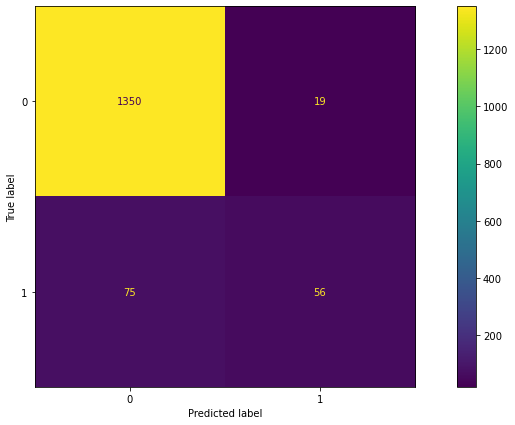

In [125]:
# define sampling
steps = [] # no preprocessing simple SVC with class weights
params = {'m__kernel': ['linear'], 
          'm__C' : [1,50,100,150,200,250,300,500,700,1000],
          'm__random_state' : [42]}

cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True, train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get train scores...
print('TEST RESULTS FROM CV (test scores)')
diff1 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff1

***
#### CV With balanced/custom class weights
***

On ACTUAL y_test TEST DATA -> 
F1 SCORE:  0.47530864197530864
RECALL SCORE:  0.5877862595419847
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1369
           1       0.40      0.59      0.48       131

    accuracy                           0.89      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.91      0.89      0.90      1500

BEST PARAMS:  {'m__C': 50, 'm__class_weight': 'balanced', 'm__kernel': 'linear', 'm__random_state': 42}
BEST (refit) Recall Score:  0.5980433632998413
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,param_m__random_state,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,10,"{0: 0.9, 1: 0.1}",linear,42,0.323638,0.484107,0.940286,0.160469
1,10,"{0: 0.8, 1: 0.2}",linear,42,0.414913,0.567199,0.945143,0.152286
2,10,"{0: 0.7, 1: 0.3}",linear,42,0.441142,0.590675,0.946857,0.149532
3,10,"{0: 0.6, 1: 0.4}",linear,42,0.441142,0.589977,0.946571,0.148834
4,10,"{0: 0.5, 1: 0.5}",linear,42,0.437916,0.586900,0.946286,0.148983
5,10,balanced,linear,42,0.463987,0.590502,0.944571,0.126515
6,20,"{0: 0.9, 1: 0.1}",linear,42,0.408408,0.564829,0.945429,0.156421
7,20,"{0: 0.8, 1: 0.2}",linear,42,0.434585,0.587543,0.946857,0.152958
8,20,"{0: 0.7, 1: 0.3}",linear,42,0.434638,0.584875,0.946286,0.150237
9,20,"{0: 0.6, 1: 0.4}",linear,42,0.434638,0.583676,0.946000,0.149039


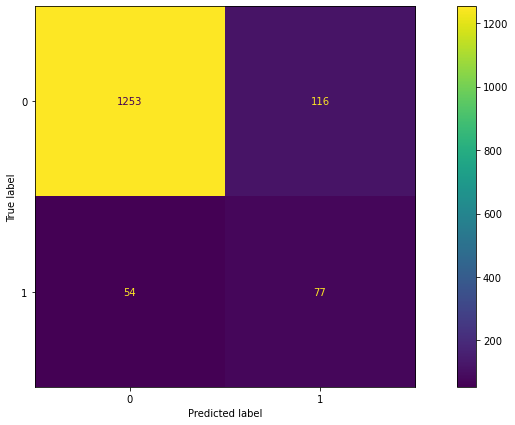

In [92]:
# define sampling
steps = [] # no preprocessing simple SVC with class weights
params = {'m__kernel': ['linear'], 
          'm__C' : [10, 20, 50,100,150,200,250,300,700],
          'm__random_state' : [42],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}

cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True,  train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff2 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff2

***
### CV WITH/WITHOUT class weights and combined over and under sampling with SMOTE and Tomek
***

On ACTUAL y_test TEST DATA -> 
F1 SCORE:  0.4672897196261682
RECALL SCORE:  0.5725190839694656
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1369
           1       0.39      0.57      0.47       131

    accuracy                           0.89      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.91      0.89      0.90      1500

BEST PARAMS:  {'m__C': 5, 'm__class_weight': {0: 0.5, 1: 0.5}, 'm__kernel': 'linear'}
BEST (refit) Recall Score:  0.630830248545743
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,"{0: 0.9, 1: 0.1}",linear,0.274511,0.428728,0.936286,0.154218
1,1,"{0: 0.8, 1: 0.2}",linear,0.392015,0.548918,0.944857,0.156903
2,1,"{0: 0.7, 1: 0.3}",linear,0.431253,0.567920,0.943714,0.136666
3,1,"{0: 0.6, 1: 0.4}",linear,0.470545,0.590407,0.943714,0.119863
4,1,"{0: 0.5, 1: 0.5}",linear,0.512956,0.607372,0.942857,0.094415
5,1,balanced,linear,0.575145,0.576741,0.926286,0.001596
6,5,"{0: 0.9, 1: 0.1}",linear,0.454204,0.585395,0.944571,0.131191
7,5,"{0: 0.8, 1: 0.2}",linear,0.529402,0.566679,0.929143,0.037276
8,5,"{0: 0.7, 1: 0.3}",linear,0.571973,0.512552,0.904000,0.059421
9,5,"{0: 0.6, 1: 0.4}",linear,0.617768,0.486015,0.883429,0.131754


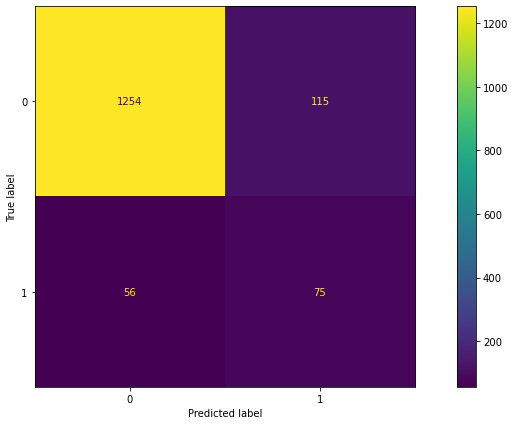

In [93]:
# define sampling
sme = SVMSMOTE(random_state=42)
steps = [('sme', sme)]
params = {'m__kernel': ['linear'], 
          'm__C' :[1,5, 7, 9 , 11,15, 20, 25],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}
cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True, train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff3 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff3

***
### CV without class weights and combined over and under sampling with SMOTE and Tomek
***

On ACTUAL y_test TEST DATA -> 
F1 SCORE:  0.4744744744744745
RECALL SCORE:  0.6030534351145038
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1369
           1       0.39      0.60      0.47       131

    accuracy                           0.88      1500
   macro avg       0.68      0.76      0.70      1500
weighted avg       0.91      0.88      0.89      1500

BEST PARAMS:  {'m__C': 1, 'm__class_weight': 'balanced', 'm__kernel': 'linear', 'm__random_state': 42}
BEST (refit) Recall Score:  0.6602326811210999
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,param_m__random_state,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,"{0: 0.9, 1: 0.1}",linear,42,0.294183,0.450758,0.937714,0.156575
1,1,"{0: 0.8, 1: 0.2}",linear,42,0.424802,0.575150,0.945714,0.150348
2,1,"{0: 0.7, 1: 0.3}",linear,42,0.493496,0.608174,0.945143,0.114679
3,1,"{0: 0.6, 1: 0.4}",linear,42,0.568641,0.605615,0.935429,0.036974
4,1,"{0: 0.5, 1: 0.5}",linear,42,0.656901,0.547018,0.902571,0.109883
5,1,balanced,linear,42,0.660233,0.490871,0.878000,0.169362
6,5,"{0: 0.9, 1: 0.1}",linear,42,0.539186,0.600768,0.937714,0.061583
7,5,"{0: 0.8, 1: 0.2}",linear,42,0.614490,0.512886,0.896000,0.101604
8,5,"{0: 0.7, 1: 0.3}",linear,42,0.620888,0.451161,0.866000,0.169728
9,5,"{0: 0.6, 1: 0.4}",linear,42,0.620941,0.422637,0.850857,0.198304


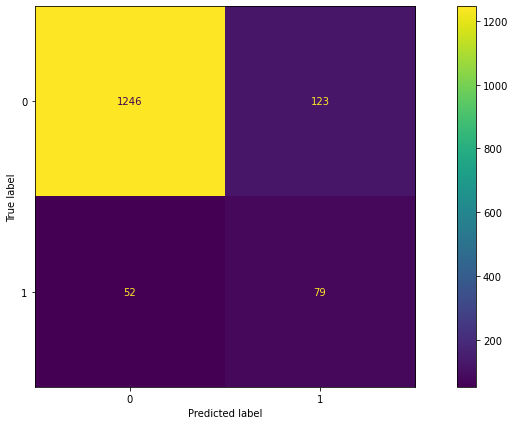

In [94]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
steps = [('ou', over_under)]
params = {'m__kernel': ['linear'], 
          'm__C' :[1,5, 7, 9 , 11,15, 20, 25, 100, 500],
          'm__random_state' : [42],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}

cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True,  train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff4 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff4

***
### With SVMSMOTE and RamdomUnderSampling
***

On ACTUAL y_test TEST DATA -> 
F1 SCORE:  0.4672897196261682
RECALL SCORE:  0.5725190839694656
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1369
           1       0.39      0.57      0.47       131

    accuracy                           0.89      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.91      0.89      0.90      1500

BEST PARAMS:  {'m__C': 5, 'm__class_weight': {0: 0.5, 1: 0.5}, 'm__kernel': 'linear'}
BEST (refit) Recall Score:  0.630830248545743
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,"{0: 0.9, 1: 0.1}",linear,0.274511,0.428728,0.936286,0.154218
1,1,"{0: 0.8, 1: 0.2}",linear,0.392015,0.548918,0.944857,0.156903
2,1,"{0: 0.7, 1: 0.3}",linear,0.431253,0.567920,0.943714,0.136666
3,1,"{0: 0.6, 1: 0.4}",linear,0.470545,0.590407,0.943714,0.119863
4,1,"{0: 0.5, 1: 0.5}",linear,0.512956,0.607372,0.942857,0.094415
5,1,balanced,linear,0.575145,0.576741,0.926286,0.001596
6,5,"{0: 0.9, 1: 0.1}",linear,0.454204,0.585395,0.944571,0.131191
7,5,"{0: 0.8, 1: 0.2}",linear,0.529402,0.566679,0.929143,0.037276
8,5,"{0: 0.7, 1: 0.3}",linear,0.571973,0.512552,0.904000,0.059421
9,5,"{0: 0.6, 1: 0.4}",linear,0.617768,0.486015,0.883429,0.131754


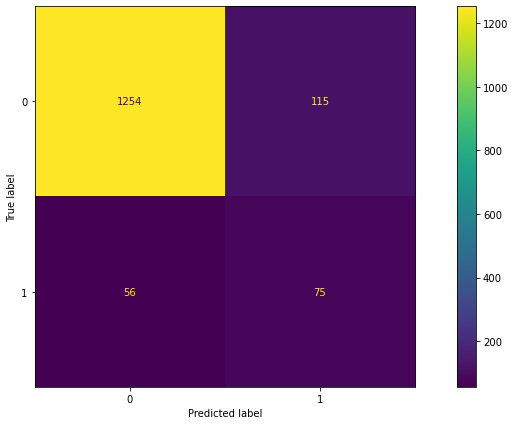

In [95]:
# define pipeline
over = SVMSMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under)]
params = {'m__kernel': ['linear'], 
          'm__C' :[1,5, 7, 9 , 11,15, 20, 25, 100, 200],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}

cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True, train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff6 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff6

***
### Using SVMSMOTE (oversampling the minority) with class weights in SVC
***

On ACTUAL y_test TEST DATA -> 
F1 SCORE:  0.4672897196261682
RECALL SCORE:  0.5725190839694656
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1369
           1       0.39      0.57      0.47       131

    accuracy                           0.89      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.91      0.89      0.90      1500

BEST PARAMS:  {'m__C': 5, 'm__class_weight': {0: 0.5, 1: 0.5}, 'm__kernel': 'linear'}
BEST (refit) Recall Score:  0.630830248545743
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,"{0: 0.9, 1: 0.1}",linear,0.274511,0.428728,0.936286,0.154218
1,1,"{0: 0.8, 1: 0.2}",linear,0.392015,0.548918,0.944857,0.156903
2,1,"{0: 0.7, 1: 0.3}",linear,0.431253,0.567920,0.943714,0.136666
3,1,"{0: 0.6, 1: 0.4}",linear,0.470545,0.590407,0.943714,0.119863
4,1,"{0: 0.5, 1: 0.5}",linear,0.512956,0.607372,0.942857,0.094415
5,1,balanced,linear,0.575145,0.576741,0.926286,0.001596
6,5,"{0: 0.9, 1: 0.1}",linear,0.454204,0.585395,0.944571,0.131191
7,5,"{0: 0.8, 1: 0.2}",linear,0.529402,0.566679,0.929143,0.037276
8,5,"{0: 0.7, 1: 0.3}",linear,0.571973,0.512552,0.904000,0.059421
9,5,"{0: 0.6, 1: 0.4}",linear,0.617768,0.486015,0.883429,0.131754


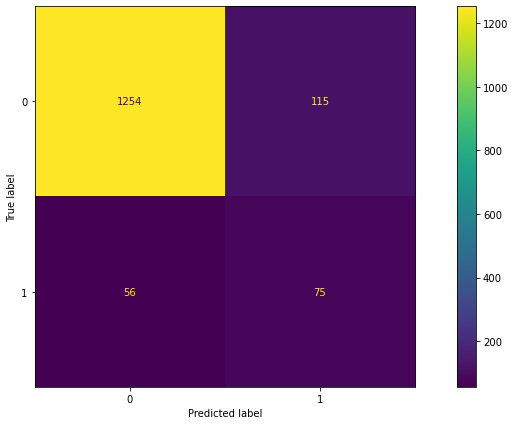

In [96]:
# define sampling
sme = SVMSMOTE(random_state=42)
steps = [('sme', sme)]
params = {'m__kernel': ['linear'], 
          'm__C' :[1,5, 7, 9 , 11,15, 20, 25, 100, 500],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}
cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True, train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff7 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff7

***
### Choosing SMOTE with Tomek links as it has highest score on recall
### Lets further fork it to find the beat paramaters
***

On ACTUAL y_test TEST DATA -> 
SVC(C=1, class_weight='balanced', kernel='linear', random_state=42)
F1 SCORE:  0.4744744744744745
RECALL SCORE:  0.6030534351145038
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1369
           1       0.39      0.60      0.47       131

    accuracy                           0.88      1500
   macro avg       0.68      0.76      0.70      1500
weighted avg       0.91      0.88      0.89      1500

BEST PARAMS:  {'m__C': 1, 'm__class_weight': 'balanced', 'm__kernel': 'linear', 'm__random_state': 42}
BEST (refit) Recall Score:  0.6602326811210999
TEST RESULTS FROM CV (test scores)


,param_m__C,param_m__class_weight,param_m__kernel,param_m__random_state,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
0,1,"{0: 0.9, 1: 0.1}",linear,42,0.294183,0.450758,0.937714,0.156575
1,1,"{0: 0.8, 1: 0.2}",linear,42,0.424802,0.575150,0.945714,0.150348
2,1,"{0: 0.7, 1: 0.3}",linear,42,0.493496,0.608174,0.945143,0.114679
3,1,"{0: 0.6, 1: 0.4}",linear,42,0.568641,0.605615,0.935429,0.036974
4,1,"{0: 0.5, 1: 0.5}",linear,42,0.656901,0.547018,0.902571,0.109883
5,1,balanced,linear,42,0.660233,0.490871,0.878000,0.169362
6,5,"{0: 0.9, 1: 0.1}",linear,42,0.539186,0.600768,0.937714,0.061583
7,5,"{0: 0.8, 1: 0.2}",linear,42,0.614490,0.512886,0.896000,0.101604
8,5,"{0: 0.7, 1: 0.3}",linear,42,0.620888,0.451161,0.866000,0.169728
9,5,"{0: 0.6, 1: 0.4}",linear,42,0.620941,0.422637,0.850857,0.198304


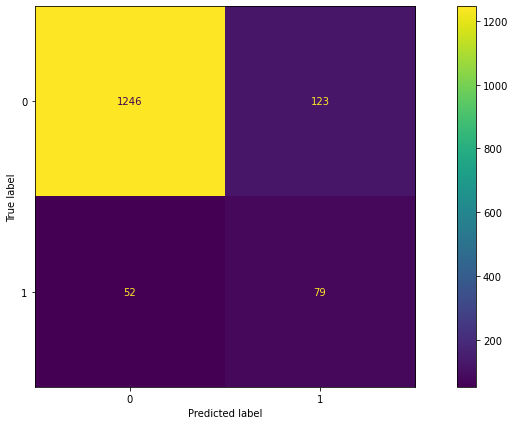

In [126]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
steps = [('ou', over_under)]
params = {'m__kernel': ['linear'], 
          'm__C' :[1,5, 7, 8, 9, 10, 50, 100, 5000],
          'm__random_state' : [42],
          'm__class_weight' : [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, 'balanced']}

cv, df_results_train, df_results_test = run_cv_SVC_Pipe(steps, params, show_classif_confusion=True,  train_test=False)
print('BEST PARAMS: ', cv.best_params_)
print('BEST (refit) Recall Score: ', cv.best_score_)

# from cv (train /test internal set) get test scores...
print('TEST RESULTS FROM CV (test scores)')
diff4 = get_lowest_diff(df_results_test, 'mean_test_recall', 'mean_test_f1')
diff4

***
>Choosing c=1, and clss_weight ={0: 0.9, 1: 0.1}
***

In [128]:
df_results_test[(df_results_test.mean_test_recall > 0.6) & (df_results_test.mean_test_f1)].sort_values(by='mean_test_f1', ascending=False)

,param_m__C,param_m__class_weight,param_m__kernel,param_m__random_state,mean_test_recall,mean_test_f1,mean_test_accuracy,diff
12,7,"{0: 0.9, 1: 0.1}",linear,42,0.601322,0.576876,0.922857,0.024446
18,8,"{0: 0.9, 1: 0.1}",linear,42,0.611105,0.558588,0.914571,0.052517
4,1,"{0: 0.5, 1: 0.5}",linear,42,0.656901,0.547018,0.902571,0.109883
24,9,"{0: 0.9, 1: 0.1}",linear,42,0.607827,0.533923,0.905714,0.073904
30,10,"{0: 0.9, 1: 0.1}",linear,42,0.611158,0.517597,0.898286,0.093561
7,5,"{0: 0.8, 1: 0.2}",linear,42,0.614490,0.512886,0.896000,0.101604
5,1,balanced,linear,42,0.660233,0.490871,0.878000,0.169362
13,7,"{0: 0.8, 1: 0.2}",linear,42,0.620888,0.459137,0.869714,0.161751
8,5,"{0: 0.7, 1: 0.3}",linear,42,0.620888,0.451161,0.866000,0.169728
19,8,"{0: 0.8, 1: 0.2}",linear,42,0.620941,0.446732,0.864000,0.174210


In [129]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_resampled, y_resampled = over_under.fit_resample(tfidfObject_train, y_train)

model = SVC(C=1, random_state=42, class_weight={0:0.5, 1:0.5}, kernel='linear')
model.fit(X_resampled, y_resampled)



NameError: name 'y_resam' is not defined

F1 SCORE:  0.5044510385756676
RECALL SCORE:  0.648854961832061
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1369
           1       0.41      0.65      0.50       131

    accuracy                           0.89      1500
   macro avg       0.69      0.78      0.72      1500
weighted avg       0.92      0.89      0.90      1500



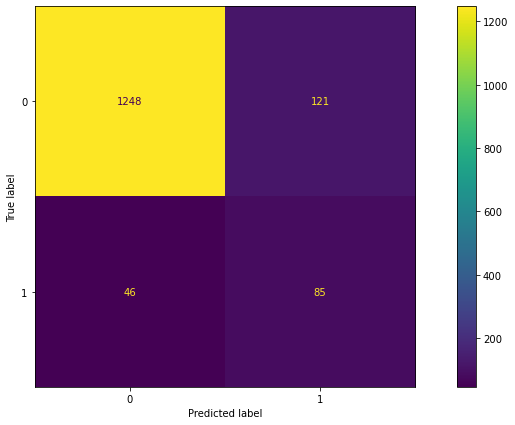

In [100]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

#resampling
X_resampled, y_resampled = over_under.fit_resample(tfidfObject_train, y_train)

# model building
final_clf = SVC(random_state=42, class_weight={0: 0.5, 1: 0.5}, kernel='linear', C=1)
final_clf.fit(X_resampled, y_resampled)

# prediction
show_confusion_clssification(final_clf, tfidfObject_test, y_test)

Best Threshold=0.677809
Best Threshold=0.949014, F-measure=0.970


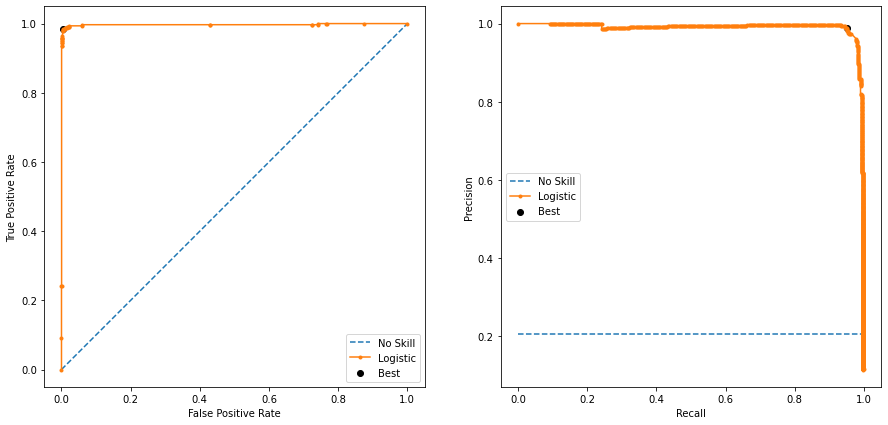

In [101]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

#resampling
X_resampled, y_resampled = over_under.fit_resample(tfidfObject_train, y_train)

# model building
rfclf = SVC(random_state=42, class_weight={0: 0.5, 1: 0.5}, kernel='linear', C=1, probability=True)
rfclf.fit(X_resampled, y_resampled)
yhat = rfclf.predict_proba(tfidfObject_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

rcParams['figure.figsize'] = 15, 7
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 2
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f-measure
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f-measure
ix = np.argmax(fscore)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# show the plot
plt.show()


In [102]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

***
Prediction of probability for SVC 
***

In [103]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y_train, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-measure_train=%.5f' % (thresholds[ix], scores[ix]))

# df_test = pd.DataFrame({'train': y_train, 'threshold_applied_train': to_labels(yhat, thresholds[ix]) })


Threshold=0.938, F-measure_train=0.97000


In [104]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)
scores = [recall_score(y_train, to_labels(yhat, t)) for t in thresholds]
print('Threshold=%.3f, Recall=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.938, Recall=0.95098


In [105]:
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

#resampling
X_resampled, y_resampled = over_under.fit_resample(tfidfObject_train, y_train)

# model building
rfclf = SVC(random_state=42, class_weight={0: 0.5, 1: 0.5}, kernel='linear', C=1, probability=True)
rfclf.fit(X_resampled, y_resampled)

prob=rfclf.decision_function(tfidfObject_test)



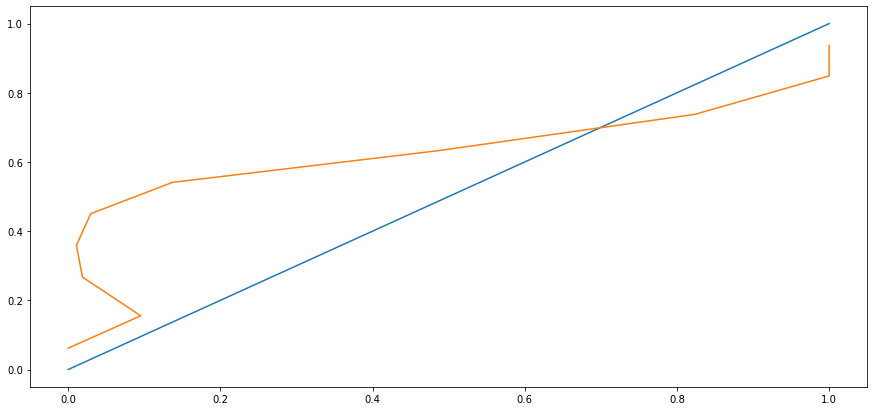

In [106]:
from sklearn.calibration import calibration_curve
x_p, y_p=calibration_curve(y_test, prob, n_bins=10, normalize= True)
plt.plot([0, 1], [0, 1])
plt.plot(x_p, y_p)
plt.show()

In [107]:
from sklearn.metrics import brier_score_loss, roc_auc_score

y_pred = rfclf.predict(tfidfObject_test)
brier_score_loss(y_test, y_pred, pos_label=2), roc_auc_score(y_test, y_pred)

(0.13733333333333334, 0.7802346394258918)

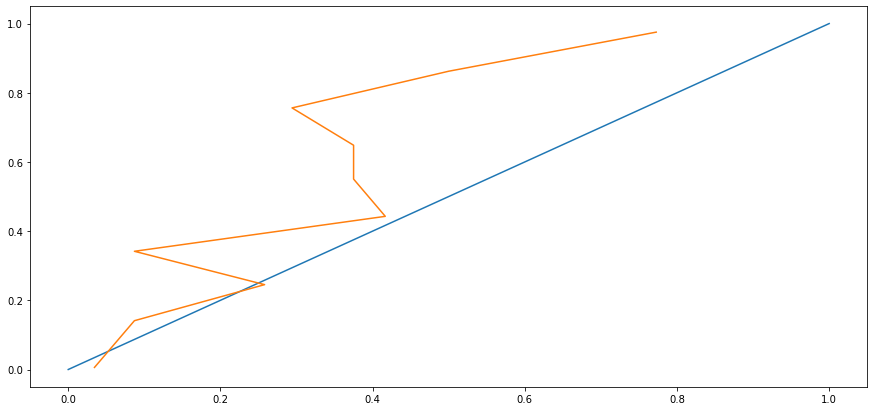

In [108]:
from sklearn.calibration import CalibratedClassifierCV 

calib_model = CalibratedClassifierCV(rfclf, method='sigmoid', cv=5) 
calib_model.fit(X_resampled, y_resampled) 
prob = calib_model.predict_proba(tfidfObject_test)[:, 1]

#plot the calibration curve (see above to know what is it)
x_p, y_p = calibration_curve(y_test, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(x_p, y_p) 
plt.show()

In [109]:
from sklearn.metrics import brier_score_loss, roc_auc_score

y_pred = calib_model.predict(tfidfObject_test)
brier_score_loss(y_test, y_pred, pos_label=2), roc_auc_score(y_test, y_pred)

(0.074, 0.743837090649552)

In [110]:
calib_model.

SyntaxError: invalid syntax (Temp/ipykernel_31920/161457684.py, line 1)